In [1]:
import pandas as pd
import numpy as np

In [2]:
#df= pd.read_csv('feature_vectors_syscalls_frequency_5_Cat.csv')
df=pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df2=df2.drop(columns=['Class'])
for i in range(0,11598):
    if int(df.at[i,'Class'])<5:
        df.at[i,'Class']=1
    else:
        df.at[i,'Class']=0
#df = pd.concat([df, df2], axis=1)

In [3]:
X=df.loc[:, df.columns != 'Class']
X

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,updateServiceLocation,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,0,37,10
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,0,2,2838,46
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,0,1,111,20
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,0,7,987,197
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,0,1,98,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,2,0,0,11,0,61,13,0,66,17,...,0,0,0,0,0,0,0,10,2764,236
11594,6,0,0,10,1,69,50,1,118,15,...,0,0,0,0,0,1,0,5,4417,295
11595,0,0,0,0,0,21,16,0,48,9,...,0,0,0,0,0,0,0,5,241,67
11596,1,0,0,15,0,90,80,0,239,50,...,0,0,0,0,0,0,0,3,1703,774


In [4]:
Y=df.loc[:,'Class']
Y

0        1
1        1
2        1
3        1
4        1
        ..
11593    0
11594    0
11595    0
11596    0
11597    0
Name: Class, Length: 11598, dtype: int64

In [5]:
folder='paper/ml_all_feat'

In [6]:
# Set input_form_file = False, when label values are array. Select 'True' from Pandas dataframe.
from optimalflow.autoFS import dynaFS_reg
reg_fs_demo = dynaFS_reg( fs_num = 25,random_state = 5,cv = 25,input_from_file = True)


reg_fs_demo.fit(X,Y)

Now in Progress - Feature Selection Iteration: [####################] 100.0%
The optimalflow autoFS identify the top 25 important features for regression are: ['FS_ACCESS(CREATE__WRITE)__', 'brk', 'resolveContentProvider', '_newselect', 'access', 'getInstallerPackageName', 'getSubscriberId', 'resolveIntent', 'CREATE_FOLDER_____', 'CREATE_THREAD_____', 'FS_ACCESS()____', 'FS_ACCESS(CREATE)____', 'FS_ACCESS(CREATE__READ__WRITE)', '__arm_nr_set_tls', 'chmod', 'clone', 'fdatasync', 'finishDrawing', 'fsync', 'ftruncate64', 'getActivityInfo', 'getAnimationScale', 'getApplicationRestrictions', 'getReceiverInfo', 'openSession'].


(25,
 ['FS_ACCESS(CREATE__WRITE)__',
  'brk',
  'resolveContentProvider',
  '_newselect',
  'access',
  'getInstallerPackageName',
  'getSubscriberId',
  'resolveIntent',
  'CREATE_FOLDER_____',
  'CREATE_THREAD_____',
  'FS_ACCESS()____',
  'FS_ACCESS(CREATE)____',
  'FS_ACCESS(CREATE__READ__WRITE)',
  '__arm_nr_set_tls',
  'chmod',
  'clone',
  'fdatasync',
  'finishDrawing',
  'fsync',
  'ftruncate64',
  'getActivityInfo',
  'getAnimationScale',
  'getApplicationRestrictions',
  'getReceiverInfo',
  'openSession'])

In [11]:
feat=['FS_ACCESS(CREATE__WRITE)__', 'brk', 'resolveContentProvider', '_newselect', 'access', 'getInstallerPackageName', 'getSubscriberId', 'resolveIntent', 'CREATE_FOLDER_____', 'CREATE_THREAD_____', 'FS_ACCESS()____', 'FS_ACCESS(CREATE)____', 'FS_ACCESS(CREATE__READ__WRITE)', '__arm_nr_set_tls', 'chmod', 'clone', 'fdatasync', 'finishDrawing', 'fsync', 'ftruncate64', 'getActivityInfo', 'getAnimationScale', 'getApplicationRestrictions', 'getReceiverInfo', 'openSession']
X=df.loc[:,feat]

In [6]:
size=[0.1,0.2,0.3,0.4]
random_forest_acc=[]
random_forest_pre=[]
random_forest_recall=[]
random_forest_f1=[]
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy: ",s, ' ' ,metrics.accuracy_score(y_test, y_pred))
    a=max(a,metrics.accuracy_score(y_test, y_pred))
    
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    print(f1_score(y_test, y_pred, average=None))
    random_forest_acc.append(metrics.accuracy_score(y_test, y_pred))
    random_forest_pre.append(precision_score(y_test, y_pred, average="macro"))
    random_forest_recall.append(recall_score(y_test, y_pred, average="macro"))

    random_forest_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  3.234375
memory (179254, 20697571)
Accuracy:  0.1   0.9775862068965517
0.9558421326961482
0.9671178955453148
0.9453648824915901
[0.92485549 0.98682877]
time  2.78125
memory (44148592, 62401302)
Accuracy:  0.2   0.975
0.9470195337907965
0.9672611848568171
0.9291611692215618
[0.90851735 0.98552172]
time  2.640625
memory (44170073, 88138889)
Accuracy:  0.3   0.975
0.9507860880482985
0.9686121681224595
0.934900874158432
[0.91626564 0.98530654]
time  1.90625
memory (44191642, 88169273)
Accuracy:  0.4   0.9780172413793103
0.9565357780856125
0.9763579070368845
0.9390471226780028
[0.92597968 0.98709188]


In [7]:
size=[0.1,0.2,0.3,0.4]
nb_acc=[]
nb_pre=[]
nb_recall=[]
nb_f1=[]
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=GaussianNB()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    nb_acc.append(metrics.accuracy_score(y_test, y_pred))
    nb_pre.append(precision_score(y_test, y_pred, average="macro"))
    nb_recall.append(recall_score(y_test, y_pred, average="macro"))
    nb_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.7224137931034482
0.6656390204777302
0.669765655013446
0.7800082120534696
Accuracy: 0.4396551724137931
0.42387158296249206
0.5887287695403753
0.6541256908644931
Accuracy: 0.4379310344827586
0.4275784400392352
0.5977397855694002
0.6524245629541167
Accuracy: 0.31918103448275864
0.3190709388905636
0.5832654119739182
0.5886845466155811


In [8]:
size=[0.1,0.2,0.3,0.4]
s_acc=[]
s_pre=[]
s_recall=[]
s_f1=[]
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import tracemalloc
import os
import psutil
 
import time

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=SVC(kernel ='rbf', random_state = 1) 
#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())
 
    # stopping the library
    tracemalloc.stop()
    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    s_acc.append(metrics.accuracy_score(y_test, y_pred))
    s_pre.append(precision_score(y_test, y_pred, average="macro"))
    s_recall.append(recall_score(y_test, y_pred, average="macro"))
    s_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  13.359375
memory (56348554, 123020628)
Accuracy: 0.8586206896551725
0.5669434731934732
0.8372397110261187
0.5582198545138516
time  10.921875
memory (10569700, 69923761)
Accuracy: 0.8508620689655172
0.5245439834722884
0.7875559447363301
0.5333579760608129
time  8.421875
memory (9409031, 61190841)
Accuracy: 0.8543103448275862
0.5397246894362543
0.8483094238664145
0.5424223016247556
time  6.296875
memory (8063055, 52458297)
Accuracy: 0.8517241379310345
0.5229430625659025
0.8568310781318201
0.5332235574396524


In [9]:
size=[0.1,0.2,0.3,0.4]
d_acc=[]
d_pre=[]
d_recall=[]
d_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=tree.DecisionTreeClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    d_acc.append(metrics.accuracy_score(y_test, y_pred))
    d_pre.append(precision_score(y_test, y_pred, average="macro"))
    d_recall.append(recall_score(y_test, y_pred, average="macro"))
    d_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9603448275862069
0.9307944116746818
0.9489407226103448
0.9149516327988054
Accuracy: 0.969396551724138
0.9391992027093119
0.951931241161737
0.927512055221247
Accuracy: 0.9617816091954023
0.930092522736469
0.9291824923132573
0.9310089600168556
Accuracy: 0.9646551724137931
0.932288908251186
0.937315565182451
0.9274413667965952


In [10]:
size=[0.1,0.2,0.3,0.4]
lr_acc=[]
lr_pre=[]
lr_recall=[]
lr_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    lr_acc.append(metrics.accuracy_score(y_test, y_pred))
    lr_pre.append(precision_score(y_test, y_pred, average="macro"))
    lr_recall.append(recall_score(y_test, y_pred, average="macro"))
    lr_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

C:\Users\Vidhi Bansal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.9155172413793103
0.8091477459690688
0.8747810363338419
0.7693401015228427


C:\Users\Vidhi Bansal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.9
0.7785818774795588
0.8401236090010261
0.7424036281179138


C:\Users\Vidhi Bansal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.9043103448275862
0.7784359548482287
0.8591962295419975
0.7358531954717964
Accuracy: 0.89375
0.7655710449823983
0.8323898912433585
0.7286846620850644


C:\Users\Vidhi Bansal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
size=[0.1,0.2,0.3,0.4]
k_acc=[]
k_pre=[]
k_recall=[]
k_f1=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    k_acc.append(metrics.accuracy_score(y_test, y_pred))
    k_pre.append(precision_score(y_test, y_pred, average="macro"))
    k_recall.append(recall_score(y_test, y_pred, average="macro"))
    k_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.925
0.8443493348756507
0.8926470588235293
0.8108523908523908
Accuracy: 0.9198275862068965
0.8305468116788871
0.8696778711484594
0.8020091992951783
Accuracy: 0.9183908045977012
0.8278135357460438
0.862604573083557
0.8017268947873362
Accuracy: 0.9066810344827586
0.8049473617478313
0.8475512440194759
0.7755700318908483


In [12]:

import numpy as np 
import matplotlib.pyplot as plt 
#t = ['10%','20%','SVM','Naive Bayes','Decision tree']
t = ['10%','20%','30%','40%']
x_axis = np.arange(len(t))
ind = np.arange(len(t)) 
width = 0.1

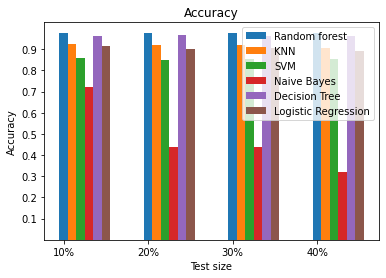

In [13]:
plt.bar(ind, random_forest_acc, width, label = 'Random forest')
plt.bar(ind+width, k_acc, width, label = 'KNN')
plt.bar(ind+width*2, s_acc, width, label = 'SVM')
plt.bar(ind+width*3, nb_acc, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_acc, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_acc, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
# Display

#plt.show()
plt.savefig(folder+'/acc.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

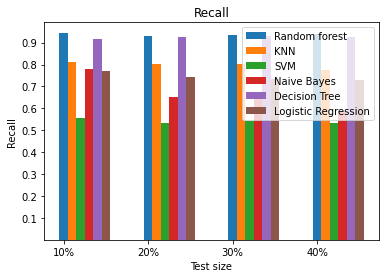

In [14]:
plt.bar(ind, random_forest_recall, width, label = 'Random forest')
plt.bar(ind+width, k_recall, width, label = 'KNN')
plt.bar(ind+width*2, s_recall, width, label = 'SVM')
plt.bar(ind+width*3, nb_recall, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_recall, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_recall, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Recall")
plt.legend()
plt.title("Recall")
# Display

#plt.show()
plt.savefig(folder+'/recall.png',facecolor=(1, 1, 1),dpi=200)

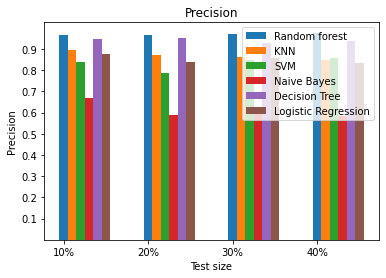

In [15]:
plt.bar(ind, random_forest_pre, width, label = 'Random forest')
plt.bar(ind+width, k_pre, width, label = 'KNN')
plt.bar(ind+width*2, s_pre, width, label = 'SVM')
plt.bar(ind+width*3, nb_pre, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_pre, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_pre, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision")
# Display

#plt.show()
plt.savefig(folder+'/Precision.png',facecolor=(1, 1, 1),dpi=200)

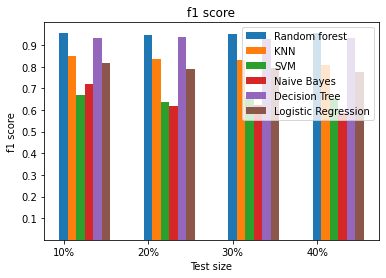

In [16]:
plt.bar(ind, random_forest_f1, width, label = 'Random forest')
plt.bar(ind+width, k_f1, width, label = 'KNN')
plt.bar(ind+width*2, s_f1, width, label = 'SVM')
plt.bar(ind+width*3, nb_f1, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_f1, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_f1, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("f1 score")
plt.legend()
plt.title("f1 score")
# Display

#plt.show()
plt.savefig(folder+'/f1_score.png',facecolor=(1, 1, 1),dpi=200)

In [17]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_acc)
per_22.append(k_acc)
per_22.append(s_acc)
per_22.append(nb_acc)
per_22.append(d_acc)
per_22.append(lr_acc)
df_acc = pd.DataFrame(per_22)
df_acc=df_acc.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_acc.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_acc.to_csv(folder+'/acc.csv')


In [18]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_recall)
per_22.append(k_recall)
per_22.append(s_recall)
per_22.append(nb_recall)
per_22.append(d_recall)
per_22.append(lr_recall)
df_recall = pd.DataFrame(per_22)
df_recall=df_recall.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_recall.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_recall.to_csv(folder+'/recall.csv')


In [19]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_pre)
per_22.append(k_pre)
per_22.append(s_pre)
per_22.append(nb_pre)
per_22.append(d_pre)
per_22.append(lr_pre)
df_pre = pd.DataFrame(per_22)
df_pre=df_pre.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_pre.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_pre.to_csv(folder+'/pre.csv')


In [20]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_f1)
per_22.append(k_f1)
per_22.append(s_f1)
per_22.append(nb_f1)
per_22.append(d_f1)
per_22.append(lr_f1)
df_f1 = pd.DataFrame(per_22)
df_f1=df_f1.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_f1.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_f1.to_csv(folder+'/f1.csv')


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\Vidhi Bansal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9456896551724138

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9754310344827586

In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9698275862068966

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9422413793103448

In [25]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

ModuleNotFoundError: No module named 'xgboost'